# Eye image processing playground

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!ls

detectors	       eyeproc.ipynb		eyes		 venv
eye_detection_demo.py  eyeprocplayground.ipynb	Untitled2.ipynb


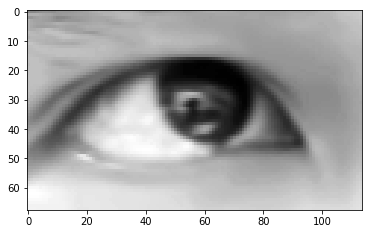

In [119]:
# Load the image, crop all eyebrows
eye = cv2.imread("eyes/brio/1.png", 0)
img_length = eye.shape[0]
eye = eye[round(img_length*0.2):round(img_length*0.8), :]
plt.imshow(eye, cmap = 'gray')

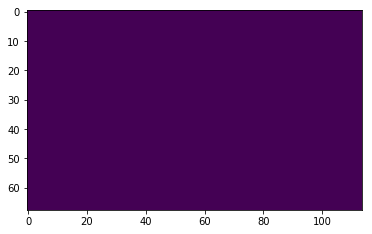

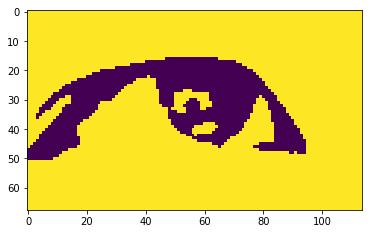

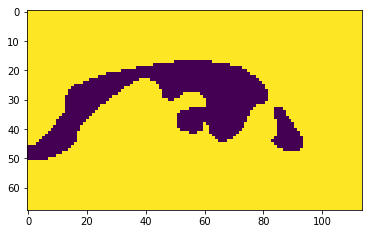

In [120]:
_,th1 = cv2.threshold(eye, 170, 255, cv2.THRESH_BINARY)
th3 = cv2.adaptiveThreshold(eye,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 45, 20)
plt.imshow(th1)
plt.show()
plt.imshow(th3)
plt.show()

smoothed_th3 = cv2.blur(th3, (8, 8))
_, smoothed_th3 = cv2.threshold(smoothed_th3, 100, 255, cv2.THRESH_BINARY)
plt.imshow(smoothed_th3)
plt.show()

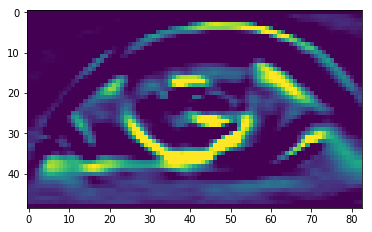

In [36]:
kernel = np.array(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]]
)*-2
dst = cv2.filter2D(eye,-1,kernel)
plt.imshow(dst)
plt.show()

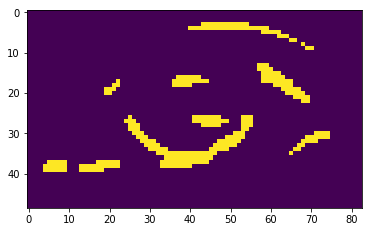

In [38]:
_,th1 = cv2.threshold(dst, 170, 255, cv2.THRESH_BINARY)
th3 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 45, 20)
plt.imshow(th1)
plt.show()

In [3]:
eye = cv2.imread("eyes/183.png")
img_length = eye.shape[0]
eye = eye[round(img_length*0.2):round(img_length*0.8), :]
eye.shape

(49, 81, 3)

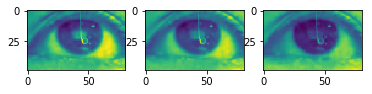

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(eye[:, :, 0])
ax2.imshow(eye[:, :, 1])
ax3.imshow(eye[:, :, 2])
plt.show()

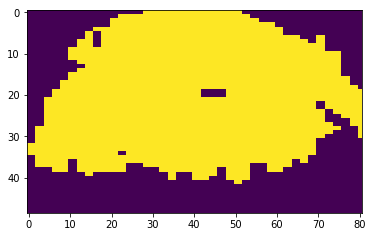

In [5]:
chan_diff = (eye[:, :, 2] - eye[:, :, 0]) * 3
_, chan_th = cv2.threshold(chan_diff, 100, 255, cv2.THRESH_BINARY)
plt.imshow(chan_th)
plt.show()

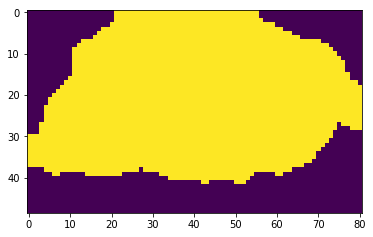

In [6]:
chan_th = cv2.blur(chan_th, (6, 6))
_, chan_th = cv2.threshold(chan_th, 100, 255, cv2.THRESH_BINARY)
plt.imshow(chan_th)
plt.show()

In [20]:
xt = np.arange(0, chan_th.shape[1])
yt = np.argmax(chan_th, axis=0)
upper_data_points = np.vstack([xt, yt]).T
upper_data_points = upper_data_points[upper_data_points[:, 1] != 0]

In [17]:
chan_th.min()

0

In [21]:
reversed_chan_th = chan_th[::-1, :]
xb = np.arange(0, reversed_chan_th.shape[1])
yb = chan_th.shape[0] - np.argmax(reversed_chan_th, axis=0)
lower_data_points = np.vstack([xb, yb]).T
lower_data_points = lower_data_points[lower_data_points[:, 1] != chan_th.shape[0]]

In [22]:
yb

array([38, 38, 38, 38, 39, 39, 40, 40, 39, 39, 39, 39, 39, 39, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 38, 39, 39, 39, 39, 40, 40,
       41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 41, 40, 39, 39, 39, 39, 39, 40, 40, 39, 39, 38, 38, 38, 37,
       37, 36, 34, 33, 32, 31, 29, 27, 28, 28, 29, 29, 29])

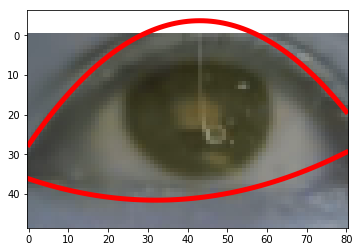

In [23]:
at, bt, ct = np.polyfit(upper_data_points[:, 0], upper_data_points[:, 1], deg=2)
ab, bb, cb = np.polyfit(lower_data_points[:, 0], lower_data_points[:, 1], deg=2)

plt.imshow(eye)
plt.plot(xt, at*xt**2 + bt*xt + ct, linewidth=5, c="red")
plt.plot(xb, ab*xb**2 + bb*xb + cb, linewidth=5, c="red")
plt.show()

In [24]:
def eye_limit(at, bt, ct, ab, bb, cb):
    a = at - ab
    b = bt - bb
    c = ct - cb
    x1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    x2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    return x1, x2

In [104]:
xl, xr = eye_limit(at, bt, ct, ab, bb, cb)
yl = at*xl**2 + bt*xl + ct
yr = at*xr**2 + bt*xr + ct

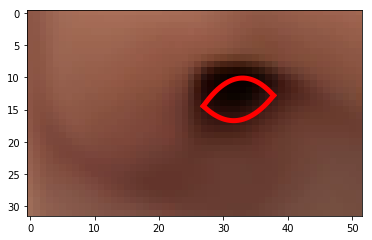

In [105]:
rgb_eye = cv2.cvtColor(eye, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_eye)
x = np.linspace(xl, xr, 1000)
plt.plot(x, at*x**2 + bt*x + ct, linewidth=5, c="red")
plt.plot(x, ab*x**2 + bb*x + cb, linewidth=5, c="red")
plt.show()